## Environment

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import umap
%matplotlib inline

In [2]:
# Set plotting settings
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
# Color palettes for organs
scimap = ["#A50CFA", "#FF804B", "#009800", "#B90000", "#FF0000", 
          "#0000FF", "#660000", "#61FFE2", "#00FF82", "#FF86FF", "#FFB623", 
          "#FFFF00"]
sns.set_palette(scimap)

## Loading data

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/main/output-data/v0.9.1/reports/atlas-ad-hoc/datasets-ct-bm-data.csv")
data.head()

,source,dataset,organ,age,sex,bmi,tool,cell_type,cell_type_label,cell_type_count,cell_type_percentage,biomarker,mean_expression_value
0,HuBMAP,https://entity.api.hubmapconsortium.org/entiti...,kidney,66.0,Male,29.1,azimuth,CL:1001108,Medullary Thick Ascending Limb,2518,0.301846,SLC12A1,27.496563
1,HuBMAP,https://entity.api.hubmapconsortium.org/entiti...,kidney,66.0,Male,29.1,azimuth,CL:1001108,Medullary Thick Ascending Limb,2518,0.301846,ESRRG,43.513153
2,HuBMAP,https://entity.api.hubmapconsortium.org/entiti...,kidney,66.0,Male,29.1,azimuth,CL:1001108,Medullary Thick Ascending Limb,2518,0.301846,MAST4,8.665642
3,HuBMAP,https://entity.api.hubmapconsortium.org/entiti...,kidney,66.0,Male,29.1,azimuth,CL:1001108,Medullary Thick Ascending Limb,2518,0.301846,ESRRB,6.511519
4,HuBMAP,https://entity.api.hubmapconsortium.org/entiti...,kidney,66.0,Male,29.1,azimuth,CL:1001108,Medullary Thick Ascending Limb,2518,0.301846,SLC4A7,6.428340


## Preparing Categorical Variables

In [4]:
data.sex = data.sex.astype("category")
data.organ = data.organ.astype("category")
data.tool = data.tool.astype("category")
data.cell_type_label = data.cell_type_label.astype("category")
data = data[['dataset','organ','sex','tool','biomarker','mean_expression_value']]

## Create Pivot Tables
This pivot table create columns for each biomarker associated with a dataset/organ pair, where values represent mean expression value for each biomarker. The pivot table uses a mean for aggregating expression values identified across the tools used to analyzed each data set (i.e., azimuth, cell typist, and popV). There are 479 datasets and 15,211 biomarkers in the data.

In [5]:
data_umap = data.pivot_table(index=['dataset','organ','sex'],
                             columns='biomarker',
                             values='mean_expression_value',
                             aggfunc='mean',
                             fill_value='0',
                             observed=True,
                             margins=False)
data_umap.shape

(479, 15211)

# UMAP Analysis

In [6]:
data_organs = data[['dataset','organ']].drop_duplicates()
scimap = ["#A50CFA", "#FF804B", "#0000FF", "#009800", "#B90000", "#660000", 
          "#FF0000", "#61FFE2", "#00FF82", "#FF86FF", "#FFFF00"]
sns.set_palette(scimap)

In [7]:
scaled_data_umap = StandardScaler().fit_transform(data_umap)
titlestring = "UMAP HRA-Pop Datasets Biomarker Mean Expression Values"

##  UMAP using Chebyshev Distance

In [21]:
reducer1 = umap.UMAP(n_neighbors=50, min_dist=.01, n_components=2, metric='chebyshev')
embedding = reducer1.fit_transform(scaled_data_umap)

<Axes: >

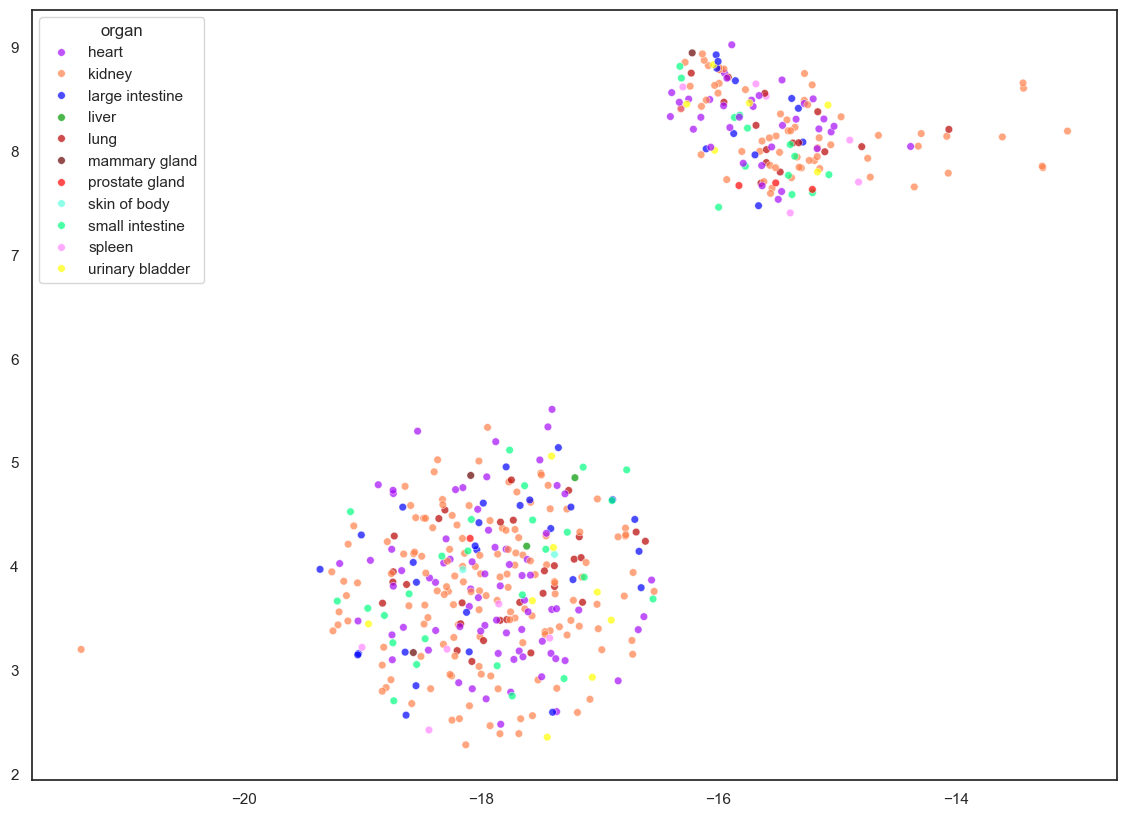

In [22]:
sns.scatterplot(x = embedding[:, 0], 
                y = embedding[:, 1], s=30,
                hue=data_organs.organ, alpha=0.7)

## UMAP using Cosine Similarity

In [25]:
reducer2 = umap.UMAP(n_neighbors=25, min_dist=.4, n_components=2, metric='cosine')
embedding2 = reducer2.fit_transform(scaled_data_umap)

<Axes: >

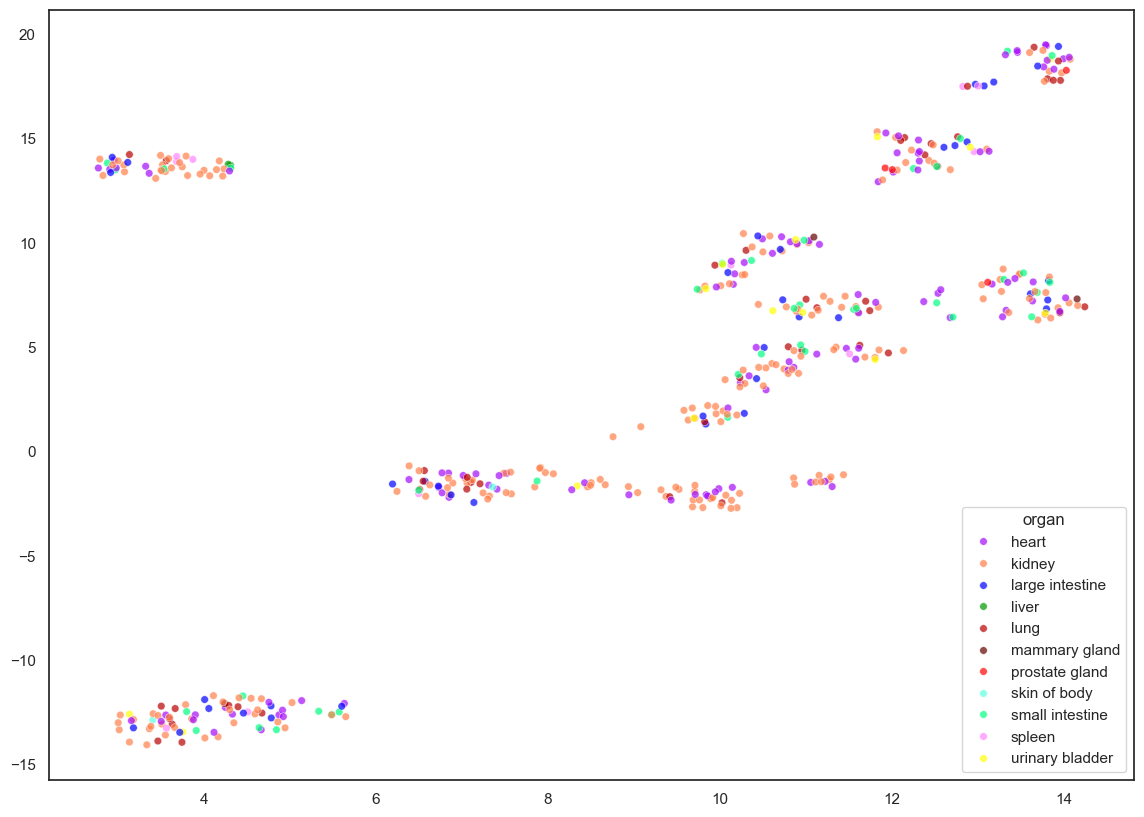

In [26]:
sns.scatterplot(x = embedding2[:, 0], 
                y = embedding2[:, 1], s=30,
                hue=data_organs.organ, alpha=0.7)

## UMAP using Pearson Correlation

In [29]:
reducer3 = umap.UMAP(n_neighbors=25, min_dist=.4, n_components=2, metric='correlation')
embedding3 = reducer3.fit_transform(scaled_data_umap)

<Axes: >

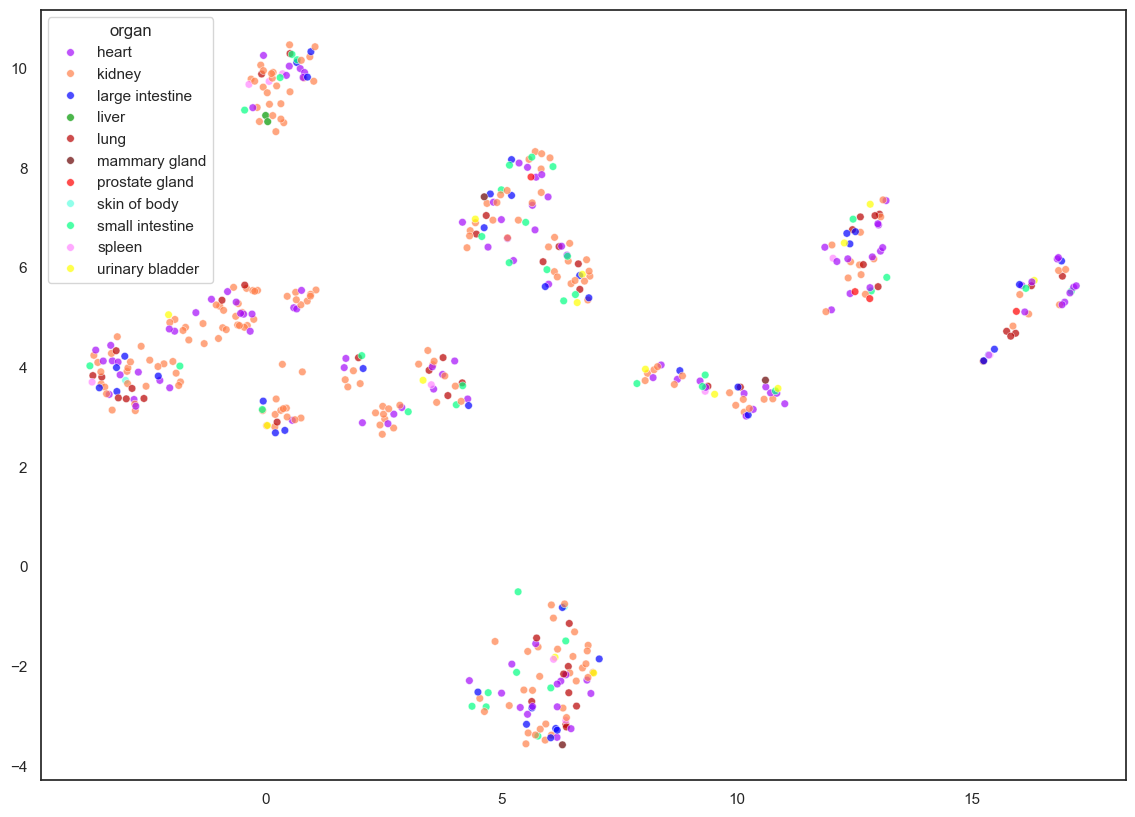

In [30]:
sns.scatterplot(x = embedding3[:, 0], 
                y = embedding3[:, 1], s=30,
                hue=data_organs.organ, alpha=0.7)

## UMAP using Canberra

In [44]:
reducer4 = umap.UMAP(n_neighbors=25, min_dist=.02, n_components=2, metric='canberra')
embedding4 = reducer4.fit_transform(scaled_data_umap)

<Axes: >

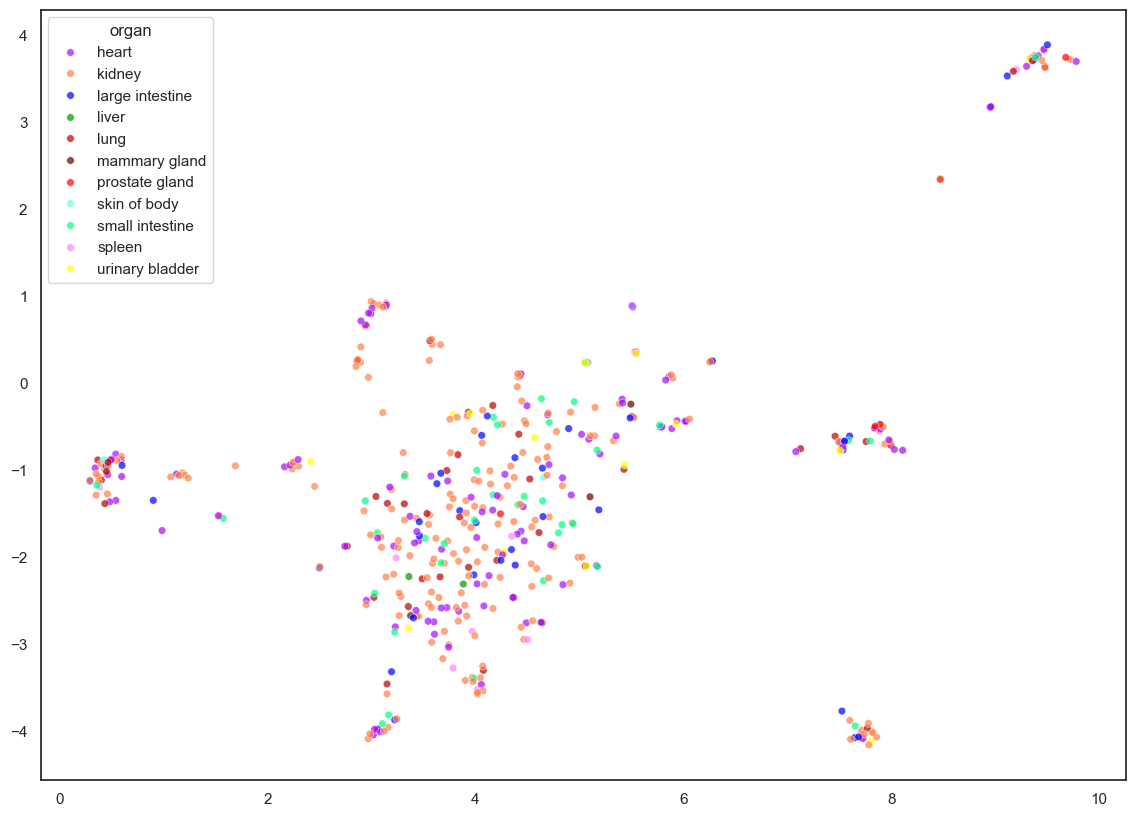

In [45]:
sns.scatterplot(x = embedding4[:, 0], 
                y = embedding4[:, 1], s=30,
                hue=data_organs.organ, alpha=0.7)